# 네이버 영화 평점

## 1. 라이브러리

In [51]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
from tqdm import tqdm_notebook

import pandas as pd

import re
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)


## 2. 데이터 로드

In [2]:
url_base = 'https://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.naver?sel=pnt&date=20220725'

page = urlopen(url_base + url_sub)

soup = BeautifulSoup(page, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&amp;date=20220725" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

## 3. 데이터 분석

In [3]:
soup.find_all('div', class_='tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=191613" title="클라우스">클라우스</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=171539" title="그린 북">그린 북</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=174830" title="가버나움">가버나움</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=144906" title="베일리 어게인">베일리 어게인</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=186114" title="밥정">밥정</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=151196" title="원더">원더</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=169240" title="아일라">아일라</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=217719" title="명탐정 코난: 할로윈의 신부">명탐정 코난: 할로윈의 신부</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=192613" title="디지몬 어드벤처 라스트 에볼루션 : 

In [4]:
print(soup.find_all(class_='tit5')[0])
print("*"*40)
print("*"*40)
soup.find_all(class_='tit5')[0].get_text()

<div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
</div>
****************************************
****************************************


'\n탑건: 매버릭\n'

### 3-1.영화명

In [5]:
soup.find_all(class_='tit5')[0].a.string

'탑건: 매버릭'

### 3-2.평점

In [6]:
soup.find_all('td','point')

[<td class="point">9.78</td>,
 <td class="point">9.74</td>,
 <td class="point">9.60</td>,
 <td class="point">9.59</td>,
 <td class="point">9.53</td>,
 <td class="point">9.53</td>,
 <td class="point">9.53</td>,
 <td class="point">9.52</td>,
 <td class="point">9.52</td>,
 <td class="point">9.51</td>,
 <td class="point">9.50</td>,
 <td class="point">9.49</td>,
 <td class="point">9.49</td>,
 <td class="point">9.48</td>,
 <td class="point">9.46</td>,
 <td class="point">9.46</td>,
 <td class="point">9.45</td>,
 <td class="point">9.45</td>,
 <td class="point">9.45</td>,
 <td class="point">9.44</td>,
 <td class="point">9.43</td>,
 <td class="point">9.43</td>,
 <td class="point">9.43</td>,
 <td class="point">9.42</td>,
 <td class="point">9.42</td>,
 <td class="point">9.42</td>,
 <td class="point">9.42</td>,
 <td class="point">9.41</td>,
 <td class="point">9.41</td>,
 <td class="point">9.41</td>,
 <td class="point">9.41</td>,
 <td class="point">9.41</td>,
 <td class="point">9.41</td>,
 <td class

In [7]:
soup.find_all('td','point')[0].string

'9.78'

In [8]:
movie_num = len(soup.find_all('td','point'))
movie_num

50

In [9]:
movie_name = [soup.find_all('div',class_="tit5")[n].a.string for n in range(movie_num)]
movie_point = \
    [soup.find_all('td',class_="point")[n].string for n in range(movie_num)]

In [10]:
movie_name[0], movie_point[0]

('탑건: 매버릭', '9.78')

In [52]:
date = pd.date_range('2022-4-1',periods=100,freq='D')
date

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
               '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14',
               '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
               '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
      

In [53]:
import urllib
from tqdm import tqdm_notebook

movie_date  = []
movie_name  = []
movie_point = []

for today in tqdm_notebook(date):
    html = 'https://movie.naver.com/' + \
            'movie/sdb/rank/rmovie.naver?sel=pnt&date={date}'
    response = urlopen(html.format(date=
                                  urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'lxml')
    end = len(soup.find_all('td', class_='point'))
    
    movie_date.extend([today for n in range(end)])
    movie_name.extend([soup.find_all('div',class_="tit5")[n].a.string for n in range(end)])
    movie_point.extend([soup.find_all('td',class_="point")[n].string for n in range(end)])

# for i in range(movie_num):
#     print(f'{movie_name} -> {movie_point} in {movie_date}')

In [13]:
date=urllib.parse.quote(today.strftime('%Y%m%d'))
date

'20220709'

In [14]:
# 100일동안의 영화를 긁어옴
len(movie_name), len(movie_point), len(movie_date)

(5000, 5000, 5000)

In [54]:
movie = pd.DataFrame({
    "date"  : movie_date
    ,"name" : movie_name
    ,"point": movie_point
})
movie.head()

,date,name,point
0,2022-04-01,클라우스,9.81
1,2022-04-01,그린 북,9.60
2,2022-04-01,장민호 드라마 최종회,9.59
3,2022-04-01,가버나움,9.59
4,2022-04-01,밥정,9.59


In [16]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5000 non-null   datetime64[ns]
 1   name    5000 non-null   object        
 2   point   5000 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 117.3+ KB


In [17]:
movie['point'] = movie['point'].astype(float)

In [18]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5000 non-null   datetime64[ns]
 1   name    5000 non-null   object        
 2   point   5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 117.3+ KB


In [19]:
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc =np.sum)
movie_best = movie_unique.sort_values(by='point',ascending=False)
movie_best.head()
# movie_unique

,point
name,
클라우스,978.91
그린 북,960.00
가버나움,959.00
밥정,954.23
베일리 어게인,953.00


## 4. 시각화
### 4-1.날자별평점을 그래프로 찍어보기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


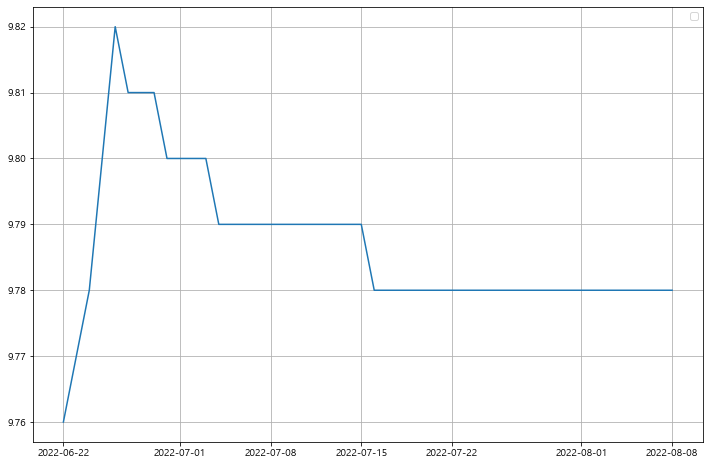

In [47]:
tmp = movie.query('name == ["탑건: 매버릭"]')
plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc="best")
plt.grid()
plt.show()

In [28]:
movie_pivot = pd.pivot_table(movie
                             , index=["date"]
                             , columns=["name"]
                             , values=["point"])
movie_pivot

point                                                     \
name       가나의 혼인잔치: 언약  가버나움 그대, 고맙소 : 김호중 생애 첫 팬미팅 무비 그린 북 극장판 바이올렛 에버가든   
date                                                                         
2022-05-01         9.40  9.59                      9.46  9.6          9.51   
2022-05-02         9.40  9.59                      9.46  9.6          9.51   
2022-05-03         9.40  9.59                      9.46  9.6          9.51   
2022-05-04         9.40  9.59                      9.46  9.6          9.51   
2022-05-05         9.40  9.59                      9.46  9.6          9.51   
...                 ...   ...                       ...  ...           ...   
2022-08-04         9.41  9.59                      9.45  9.6          9.50   
2022-08-05         9.41  9.59                      9.45  9.6          9.50   
2022-08-06         9.41  9.59                      9.45  9.6          9.50   
2022-08-07         9.41  9.59                      9.45  9.6          9.50   
2022-08-08         9.41  9.59                      9.45  9.6          9.50   

                                                              ...        \
name       글래디에이터 나 홀로 집에    당갈    덕구 디지몬 어드벤처 라스트 에볼루션 : 인연  ...  타이타닉   
date                                                          ...         
2022-05-01   9.41    9.43  9.49  9.43                   9.54  ...  9.41   
2022-05-02   9.41    9.43  9.49  9.43                   9.54  ...  9.41   
2022-05-03   9.41    9.43  9.49  9.43                   9.54  ...  9.41   
2022-05-04   9.41    9.43  9.49  9.43                   9.54  ...  9.41   
2022-05-05   9.41    9.43  9.49  9.43                   9.54  ...  9.41   
...           ...     ...   ...   ...                    ...  ...   ...   
2022-08-04   9.41    9.43  9.49  9.44                   9.51  ...  9.41   
2022-08-05   9.41    9.43  9.49  9.44                   9.51  ...  9.41   
2022-08-06   9.41    9.43  9.49  9.44                   9.51  ...  9.41   
2022-08-07   9.41    9.43  9.49  9.44                   9.51  ...  9.41   
2022-08-08   9.41    9.43  9.49  9.44                   9.51  ...  9.41   

                                                                            \
name       탑건: 매버릭   태극권 터미네이터 2:오리지널 토이 스토리 3 포드 V 페라리 포레스트 검프 헌터 킬러   헬프   
date                                                                         
2022-05-01     NaN  9.38         9.45     9.39     9.48    9.41  9.38  9.4   
2022-05-02     NaN  9.38         9.45     9.39     9.48    9.41  9.38  9.4   
2022-05-03     NaN  9.38         9.45     9.39     9.48    9.41  9.38  9.4   
2022-05-04     NaN  9.38         9.45     9.39     9.48    9.41  9.38  9.4   
2022-05-05     NaN  9.38         9.45     9.39     9.48    9.41  9.38  9.4   
...            ...   ...          ...      ...      ...     ...   ...  ...   
2022-08-04    9.78  9.39         9.45     9.39     9.48    9.41  9.38  9.4   
2022-08-05    9.78  9.39         9.45     9.39     9.48    9.41  9.38  9.4   
2022-08-06    9.78  9.39         9.45     9.39     9.48    9.41  9.38  9.4   
2022-08-07    9.78  9.39         9.45     9.39     9.48    9.41  9.38  9.4   
2022-08-08    9.78  9.39         9.45     9.39     9.48    9.41  9.38  9.4   

                   
name       히든 피겨스  
date               
2022-05-01   9.39  
2022-05-02   9.39  
2022-05-03   9.39  
2022-05-04   9.39  
2022-05-05   9.39  
...           ...  
2022-08-04   9.39  
2022-08-05   9.39  
2022-08-06   9.39  
2022-08-07   9.39  
2022-08-08   9.39  

[100 rows x 53 columns]

In [36]:
movie_pivot.to_csv('../data/3-2 naver movie movie_pivot_table.csv'
                   , sep=','
                   , encoding='cp949')

In [38]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,가나의 혼인잔치: 언약,가버나움,"그대, 고맙소 : 김호중 생애 첫 팬미팅 무비",그린 북,극장판 바이올렛 에버가든,글래디에이터,나 홀로 집에,당갈,덕구,디지몬 어드벤처 라스트 에볼루션 : 인연,...,타이타닉,탑건: 매버릭,태극권,터미네이터 2:오리지널,토이 스토리 3,포드 V 페라리,포레스트 검프,헌터 킬러,헬프,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2022-05-01,9.4,9.59,9.46,9.6,9.51,9.41,9.43,9.49,9.43,9.54,...,9.41,NaN,9.38,9.45,9.39,9.48,9.41,9.38,9.4,9.39
2022-05-02,9.4,9.59,9.46,9.6,9.51,9.41,9.43,9.49,9.43,9.54,...,9.41,NaN,9.38,9.45,9.39,9.48,9.41,9.38,9.4,9.39
2022-05-03,9.4,9.59,9.46,9.6,9.51,9.41,9.43,9.49,9.43,9.54,...,9.41,NaN,9.38,9.45,9.39,9.48,9.41,9.38,9.4,9.39
2022-05-04,9.4,9.59,9.46,9.6,9.51,9.41,9.43,9.49,9.43,9.54,...,9.41,NaN,9.38,9.45,9.39,9.48,9.41,9.38,9.4,9.39
2022-05-05,9.4,9.59,9.46,9.6,9.51,9.41,9.43,9.49,9.43,9.54,...,9.41,NaN,9.38,9.45,9.39,9.48,9.41,9.38,9.4,9.39


In [39]:
movie_pivot.columns

Index(['가나의 혼인잔치: 언약', '가버나움', '그대, 고맙소 : 김호중 생애 첫 팬미팅 무비', '그린 북',
       '극장판 바이올렛 에버가든', '글래디에이터', '나 홀로 집에', '당갈', '덕구',
       '디지몬 어드벤처 라스트 에볼루션 : 인연', '라이언 일병 구하기', '레옹', '매트릭스', '먼 훗날 우리',
       '명탐정 코난: 할로윈의 신부', '반지의 제왕: 왕의 귀환', '밥정', '범죄도시2', '베일리 어게인',
       '보헤미안 랩소디', '빽 투 더 퓨쳐', '사운드 오브 뮤직', '살인의 추억', '센과 치히로의 행방불명', '쇼생크 탈출',
       '쉰들러 리스트', '씽2게더', '아일라', '알라딘', '어벤져스: 엔드게임', '원더', '월-E', '위대한 쇼맨',
       '인생은 아름다워', '장민호 드라마 최종회', '잭 스나이더의 저스티스 리그', '주전장', '죽은 시인의 사회',
       '집으로...', '캐스트 어웨이', '클라우스', '클래식', '클레멘타인', '타이타닉', '탑건: 매버릭', '태극권',
       '터미네이터 2:오리지널', '토이 스토리 3', '포드 V 페라리', '포레스트 검프', '헌터 킬러', '헬프',
       '히든 피겨스'],
      dtype='object', name='name')

In [40]:
movie_pivot.to_csv('../data/3-2 naver movie movie_pivot_table1.csv'
                   , sep=','
                   , encoding='cp949')

In [49]:
a = movie_best[:5].copy()
a = a.reset_index()
a

,name,point
0,클라우스,978.91
1,그린 북,960.00
2,가버나움,959.00
3,밥정,954.23
4,베일리 어게인,953.00


In [50]:
target_col = a['name']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

NameError: name 'movie_pivot' is not defined

<Figure size 864x432 with 0 Axes>

In [45]:
"타이타닉" in movie_name 

True